In [ ]:
pip install timm

     |████████████████████████████████| 376 kB 4.9 MB/s 


In [ ]:
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt

In [ ]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

Downloading: "https://github.com/intel-isl/MiDaS/archive/master.zip" to /root/.cache/torch/hub/master.zip


Loading weights:  None


Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_lite3-b733e338.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_lite3-b733e338.pth
Downloading: "https://github.com/intel-isl/MiDaS/releases/download/v2_1/model-small-70d6b9c8.pt" to /root/.cache/torch/hub/checkpoints/model-small-70d6b9c8.pt


  0%|          | 0.00/81.8M [00:00<?, ?B/s]

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

MidasNet_small(
  (pretrained): Module(
    (layer1): Sequential(
      (0): Conv2dSameExport(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
      (3): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act1): ReLU6(inplace=True)
          (se): Identity()
          (conv_pw): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act2): Identity()
        )
      )
      (4): Sequential(
        (0): InvertedResidual(
          (conv_pw): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(144,

In [ ]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


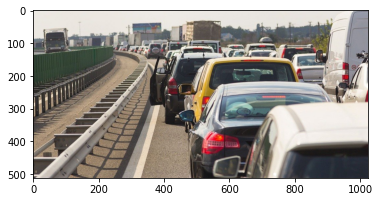

In [ ]:
img = cv2.imread('car.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
input_batch = transform(img).to(device)

In [ ]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

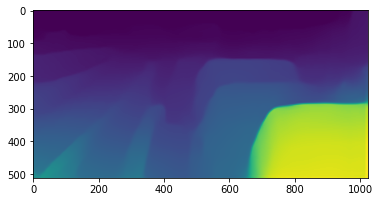

In [ ]:
plt.imshow(output)

In [ ]:
!pip install pyyaml==5.1
# This is the current pytorch version on Colab. Uncomment this if Colab changes its pytorch version
# !pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 274 kB 5.4 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=ba475bf966caa2f25878cf282a6acd8c89d530b0baacf1dcbc430a9cd9b924dc
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
     |████████████████████████████████| 6.9 MB 728 kB/s 
     |████████████████████████████████| 49 kB 2.9 MB/s 
     |████████████████████████████████| 130 kB 9.7 MB/s 
     |████████████████████████████████| 74 kB 3.0 MB/s 
     |████████████████████████████████| 145 kB 44.9 MB/s 
     |████████████████████████████████| 748 kB 47.5 MB/s 
     |████████████████████████████████| 743 kB 46.7 MB/s 
     |███

In [ ]:
# check pytorch installation: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.9")

1.9.0+cu111 True


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(img)

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [ ]:
print(outputs['instances'])

Instances(num_instances=22, image_height=512, image_width=1024, fields=[pred_boxes: Boxes(tensor([[ 443.5923,  174.9448,  940.8790,  498.6994],
        [  30.6213,   55.5243,  114.7736,  131.8968],
        [ 368.3075,  117.2865,  584.1191,  323.4133],
        [ 643.0582,  101.0364,  747.7985,  143.4443],
        [ 788.1056,  130.4923,  890.8201,  225.0362],
        [ 319.3162,  110.9671,  343.7266,  135.2038],
        [ 930.6433,  149.1065, 1023.8956,  285.9303],
        [ 429.7330,  140.5840,  791.1600,  341.8902],
        [ 352.9412,  129.8279,  435.5460,  287.3203],
        [ 563.1072,  265.8441, 1023.9135,  510.1004],
        [ 581.0195,  105.0132,  649.0298,  143.6230],
        [ 735.9944,  106.5582,  861.0728,  159.0653],
        [ 334.8717,   98.3366,  395.2235,  149.2747],
        [ 867.7537,    0.0000, 1020.3926,  279.3775],
        [ 326.6269,  111.2700,  351.9811,  136.5673],
        [ 404.5602,  121.2118,  447.9183,  157.1750],
        [ 689.3687,   81.5528,  732.6279,   99

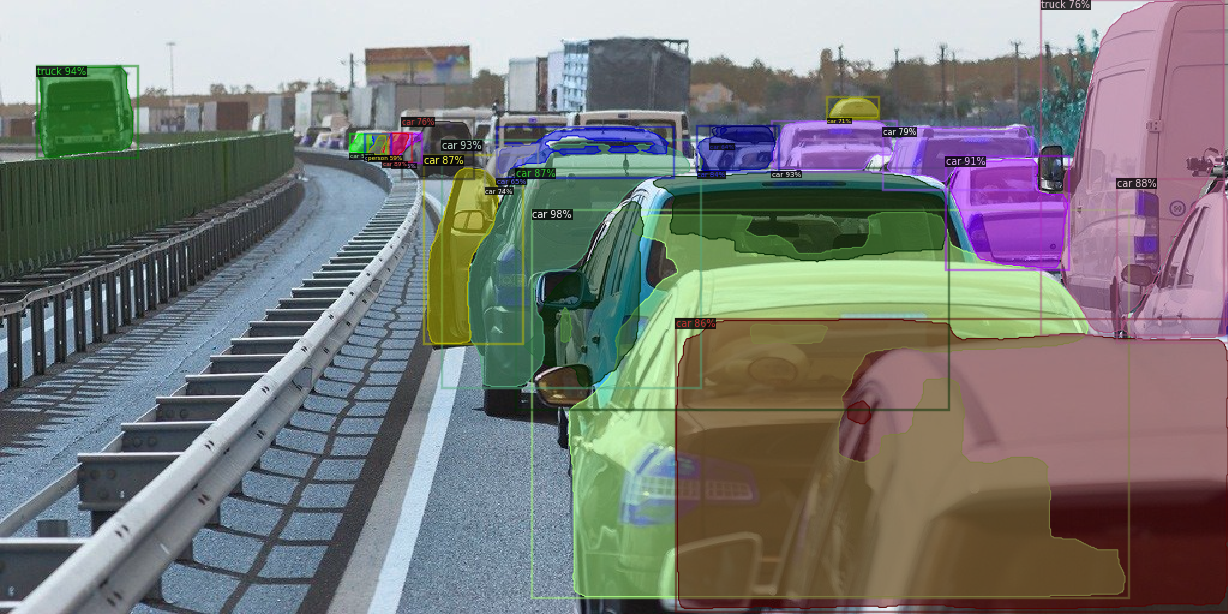

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

[[   0.          0.          0.       ...   84.793686   82.86801
    82.44757 ]
 [   0.          0.          0.       ...   85.02669    83.157616
    82.74952 ]
 [   0.          0.          0.       ...   86.09112    84.48645
    84.13605 ]
 ...
 [ 828.7412    829.0184    830.36865  ... 1676.7473   1671.082
  1670.0375  ]
 [ 824.6773    824.9307    826.1284   ... 1675.9893   1669.9487
  1668.8303  ]
 [ 823.86005   824.1093    825.2781   ... 1675.8395   1669.7097
  1668.5735  ]]


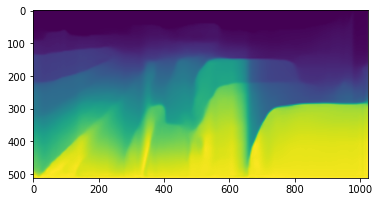

In [ ]:
from sklearn.preprocessing import MinMaxScaler
print(output)
scaler = MinMaxScaler(feature_range = (-1,1))
depth = scaler.fit_transform(output)
plt.imshow(depth)

In [ ]:
img.shape

(512, 1024, 3)

In [ ]:
pred_masks = outputs['instances'].pred_masks.cpu().numpy()
labels = outputs['instances'].pred_classes.cpu().numpy()
axis = outputs['instances'].pred_boxes
max = -1000000000
maxi = 0
for i , mask in enumerate(pred_masks):
  d = np.sum(output[mask])
  if d > max:
    max = d 
    maxi = i

print(max,' ',maxi,' ',labels[maxi],' ',list(axis[maxi].__iter__())[0] )

129350570.0   9   2   tensor([ 563.1072,  265.8441, 1023.9135,  510.1004], device='cuda:0')


In [ ]:
def left_rigth (x):
  limit = img.shape[1]/2
  text = ''
  if x > limit:
    text += 'left'
    print('left')
  else:
    text += 'rigth'
    print('rigth')

left_rigth(list(axis[maxi].__iter__())[0][0])

left


In [ ]:
Carmax = -1000000000
Carmaxi = 0
if 2 not in labels:
  print("Not Car")
else:
  for i , mask in enumerate(pred_masks):
    if labels[i] == 2:
      d = np.sum(output[mask])
      if d > Carmax:
        Carmax = d 
        Carmaxi = i
  print(Carmax,' ',Carmaxi,' ',labels[Carmaxi],' ',list(axis[Carmaxi].__iter__())[0] )

129350570.0   9   2   tensor([ 563.1072,  265.8441, 1023.9135,  510.1004], device='cuda:0')


In [ ]:
left_rigth(list(axis[Carmaxi].__iter__())[0][0])

left


In [ ]:
def near (depth):
  if depth > 10:
    print("near")
  else:
    print("not near")

near(max)
near(Carmax)

near
near


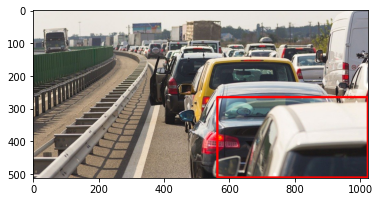

In [ ]:
color = (255, 0, 0)
x1,y1 , x2,y2 = list(axis[Carmaxi].__iter__())[0][0] , list(axis[Carmaxi].__iter__())[0][1], list(axis[Carmaxi].__iter__())[0][2],list(axis[Carmaxi].__iter__())[0][3]
nearest_car = cv2.rectangle(img, (x1,y1), (x2,y2), color, 5)
plt.imshow( nearest_car) 

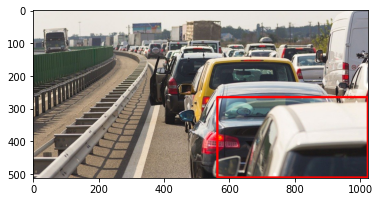

In [ ]:
color = (255, 0, 0)
x1,y1 , x2,y2 = list(axis[maxi].__iter__())[0][0] , list(axis[maxi].__iter__())[0][1], list(axis[maxi].__iter__())[0][2],list(axis[maxi].__iter__())[0][3]
nearest_object = cv2.rectangle(img, (x1,y1), (x2,y2), color, 5)
plt.imshow( nearest_object) 